# Practice Session 1
### Index
1. Numpy
2. Pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Numpy review

In [3]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

## 브로드캐스팅 (broadcasting)의 규칙
- 자동으로 shape을 맞춰 연산하게 해줌

NumPy에서의 브로드캐스팅은 두 배열 간의 상호 작용을 결정하기 위해 다음과 같은 규칙들을 따릅니다:

- 규칙 1: 두 배열이 차원의 수에서 차이가 나면, 차원이 더 적은 배열의 형태는 그 앞쪽(왼쪽)에 1로 패딩됩니다.
- 규칙 2: 두 배열의 형태가 어느 차원에서도 일치하지 않으면, 해당 차원에서 형태가 1인 배열이 다른 형태와 일치하도록 늘어납니다.
- 규칙 3: 어떤 차원에서든 크기가 일치하지 않고 둘 다 1이 아닌 경우, 오류가 발생합니다.

이 규칙들을 명확하게 이해하기 위해 몇 가지 예를 자세히 살펴보겠습니다.

In [4]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

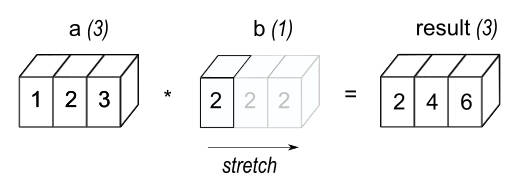

a => 4 X 3 X 5  b => 3 X 5 <br>
a => 4 X 3 X 5  b => 1 X 3 X 5 <br>
a => 4 X 3 X 5  b => 4 X 3 X 5 <br>
\---------------

In [5]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

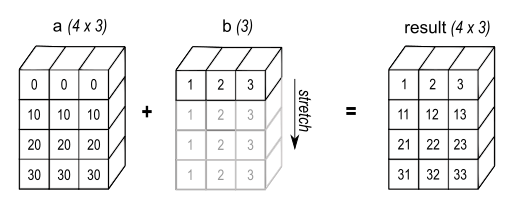

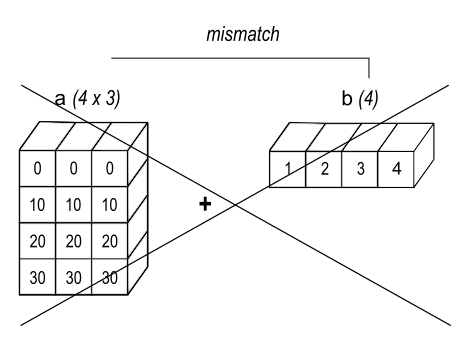

a => 4 b => 3 <br>
a => 4 x 1 b => 3 <br>
a => 4 x 1 b => 1 x 3 <br>
a => 4 x 3 b => 4 x 3 <br>

In [6]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b # 임의로 new axis를 만들어 준다

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

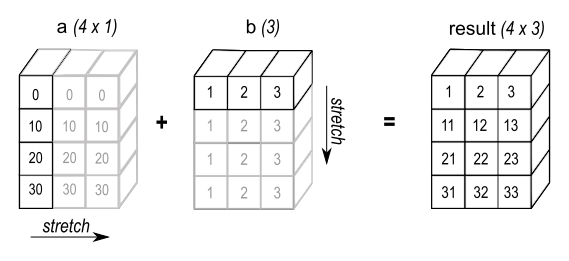

In [7]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

다시 한번, 우리는 array의 shape를 생각해보겠습니다:

- `a.shape`은 `(3, 1)`입니다.
- `b.shape`은 `(3,)`입니다.

규칙 1에 따르면 `b`의 shape를 1로 패딩해야 합니다:

- `a.shape`은 그대로 `(3, 1)`입니다.
- `b.shape`은 `(1, 3)`이 됩니다.

그리고 규칙 2에 따라서 이러한 ``1``들을 다른 array의 해당 크기와 일치하도록 업데이트해야 합니다:

- `a.shape`은 `(3, 3)`이 됩니다.
- `b.shape`은 `(3, 3)`이 됩니다.

이제 두 array의 shape이 일치하기 때문에 두 array는 연산이 가능합니다.

In [8]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [12]:
M = np.ones((3, 2)) 
a = np.arange(3) # 1 X 3

[0 1 2]


In [10]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

다음은 위 예제와는 다른 예시입니다:

- `M.shape`은 `(3, 2)`입니다.
- `a.shape`은 `(3,)`입니다.

규칙 1에 따르면 `a`의 shape를 1로 패딩해야 합니다:

- `M.shape`은 그대로 `(3, 2)`입니다.
- `a.shape`은 `(1, 3)`이 됩니다.

규칙 2에 따라서 `a`의 첫 번째 차원은 `M`의 차원과 일치하도록 늘어납니다:

- `M.shape`은 그대로 `(3, 2)`입니다.
- `a.shape`은 `(3, 3)`이 됩니다.

이제 규칙 3을 생각해보면, 최종 shape이 일치하지 않기 때문에 이 두 array는 연산이 되지 않습니다.

### Broadcasting in Practice

데이터를 전처리 할 때, 우리는 zero mean으로 데이터를 변형해주는 경우가 많습니다. 그럴 때 우린 broadcasting을 사용하여 연산을 진행합니다.

In [ ]:
X = np.random.randn(100, 30)
X.shape

(100, 30)

In [ ]:
X.mean(0).shape

(30,)

In [ ]:
normalized_X = X - X.mean(0)

## Quiz

In [18]:
a = (10, 32, 4)
b = (1, 4, 4)

# # 규칙 2: 
# # 10과 1, 32와 4가 일치 하지 않음

# 10 x 32 x 4
# 10 x 4 x 4

# -----------------
# # 형태가 1인 부분만 바뀔 수 있어서 False

In [19]:
a = (2, 5, 10)
b = (10)

# a = 2 x 5 x 10
# b = 1 x 1 x 10
# --------------
# True

In [20]:
a = (1, 5)
b = (5, 5, 5)

# a = 1 x 1 x 5
# b = 5 x 5 x 5
# ---------------
# True

# 2. Pandas review

# `Series` object
`pandas` library에는 다음과 같은 유용한 data structures가 있습니다:
* `Series` object는 1D array로, 스프레드시트의 열과 유사합니다 (열 이름과 행 레이블이 있음).
* `DataFrame` object는 2D table로, 스프레드시트와 유사합니다 (열 이름과 행 레이블이 있음).
* `Panel` object입니다. `Panel`을 `DataFrame`의 dictionary로 볼 수 있습니다.

In [21]:
s = pd.Series([2,-1,3,5]) # 인덱싱이 되어 있다
s

0    2
1   -1
2    3
3    5
dtype: int64

## 1차원 `ndarray`와의 유사성
`Series` object는 1차원 NumPy `ndarray`와 매우 유사하게 동작하며, 종종 이를 NumPy 함수의 매개변수로 전달할 수 있습니다:

In [22]:
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Series에 대한 산술 연산도 가능하며, 이는 ndarray와 마찬가지로 elements별로 적용됩니다:

In [23]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

In [24]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

In [25]:
s

0    2
1   -1
2    3
3    5
dtype: int64

In [26]:
#s[조건]

s[s < 0]

1   -1
dtype: int64

In [27]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index labels
`Series` object의 각 항목에는 *Index labels*라는 고유한 식별자가 있습니다. 기본적으로는 `Series` 내의 항목의 순서입니다(`0`에서 시작). 하지만 인덱스 레이블을 수동으로 설정할 수도 있습니다:

In [28]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [29]:
s2[1]

83

In [30]:
s2["bob"]

83

레이블로 접근하는 경우와 정수로 접근하는 경우를 명확하게 구분하기 위해, 레이블로 접근할 때는 항상 loc 함수을 사용하고, 정수 위치로 접근할 때는 iloc 함수를 사용하는 것이 권장됩니다.

In [31]:
s2.loc["bob"] # 레이블로 접근

83

In [32]:
s2.iloc[1] # 정수로 접근

83

## Init from `dict`
`dict`에서 `Series` object를 생성할 수 있습니다. 키는 인덱스 레이블로 사용됩니다:

In [33]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3 # 딕셔너리 형태로 많이 만들어준다

alice     68
bob       83
colin     86
darwin    68
dtype: int64

## Automatic alignment
연산이 여러 `Series` object를 포함할 때, `pandas`는 자동으로 인덱스 레이블을 매칭하여 항목을 정렬합니다.

In [35]:
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [36]:
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [37]:
print(s2.keys())
print(s3.keys())

s2 + s3 # 키값을 자동으로 맞추고 없는 것은 NaN

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

The resulting `Series` contains the union of index labels from `s2` and `s3`. Since `"colin"` is missing from `s2` and `"charles"` is missing from `s3`, these items have a `NaN` result value. (ie. Not-a-Number means *missing*).

Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items. But if you forget to set the right index labels, you can have surprising results:


결과로 나오는 `Series`는 `s2`와 `s3`에서의 인덱스 레이블의 합집합을 모두 사용합니다. `"colin"`은 `s2`에서 누락되었고, `"charles"`는 `s3`에서 누락되었기 때문에, 이 항목들은 `NaN` 결과 값을 갖습니다.

자동 정렬은 구조와 누락된 항목이 다양한 여러 소스에서 오는 데이터를 다룰 때 매우 유용합니다. 하지만 올바른 인덱스 레이블을 설정하는 것을 잊으면 다음과 같은 결과를 얻을 수 있습니다:

In [38]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5 # 키값을 우선적으로 비교해서

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

# `DataFrame` object
`DataFrame` object는 스프레드시트를 나타냅니다. 즉 셀 값, 열 이름, 행 인덱스 레이블이 포함됩니다. 또한 `DataFrame`을 `Series`의 dictionary로 볼 수 있습니다.

## `DataFrame` 생성하기
`Series` object의 dictionary를 전달하여 `DataFrame`을 생성할 수 있습니다:

In [40]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


주의해야 할 몇 가지 사항:
* `Series`는 인덱스를 기반으로 자동으로 정렬되었습니다.
* 누락된 값은 `NaN`으로 표시됩니다.
* `Series`의 이름은 무시됩니다(`"year"` 이름은 삭제되었습니다).

## Accessing columns

In [ ]:
people["birthyear"] # 리스트

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [42]:
people[["birthyear", "hobby"]] # dataframe

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [43]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


`DataFrame`을 생성하는 또 다른 편리한 방법은 모든 값을 생성자에 `ndarray` 또는 리스트의 리스트로 전달하고 열 이름과 행 인덱스 레이블을 별도로 지정하는 것입니다:

In [44]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


또한 dictionary (또는 리스트)의 dictionary (또는 리스트)로 DataFrame을 생성하는 것도 가능합니다:

In [41]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## Accessing rows

In [45]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

In [46]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

In [47]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [48]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


In [49]:
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


## Adding and removing columns
일반적으로 DataFrame object를 Series의 dictionary처럼 취급할 수 있습니다:

In [50]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [51]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [52]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [53]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})
people

,hobby,weight,age,over 30,pets
alice,Biking,68,33,True,NaN
bob,Dancing,83,34,True,0.0
charles,NaN,112,26,False,5.0


새로운 열을 추가할 때, 기본적으로 끝(오른쪽)에 추가됩니다. `insert()` 메서드를 사용하여 다른 위치에 열을 삽입할 수도 있습니다:

In [54]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


## Assigning new columns
`assign()` 메서드를 호출하여 새로운 열을 생성할 수도 있습니다. 이것은 새로운 `DataFrame` object를 반환하며, 원본은 수정되지 않는다는 점을 주의하세요:

In [55]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


In [56]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


`assign()` 메서드에 함수(일반적으로 `lambda` 함수)를 전달할 수 있으며, 이 함수는 `DataFrame`을 매개변수로 호출됩니다:


In [57]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


## Sorting a `DataFrame`
`sort_index` 메서드를 호출하여 `DataFrame`을 정렬할 수 있습니다. 기본적으로는 인덱스 레이블을 기준으로 행을 오름차순으로 정렬됩니다:

In [58]:
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets
charles,NaN,185,112,26,False,5.0
bob,Dancing,181,83,34,True,0.0
alice,Biking,172,68,33,True,NaN


In [59]:
people # sorting 안됨

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


In [60]:
people.sort_index(axis=1, inplace=True)

# inplace: sorting이 자동으로 된 걸로 저장이 됨
people

,age,height,hobby,over 30,pets,weight
alice,33,172,Biking,True,NaN,68
bob,34,181,Dancing,True,0.0,83
charles,26,185,NaN,False,5.0,112


레이블 대신 값으로 `DataFrame`을 정렬하려면 `sort_values`를 사용하고 정렬할 열을 지정할 수 있습니다:

In [61]:
people.sort_values(by="age", inplace=True)
people

,age,height,hobby,over 30,pets,weight
charles,26,185,NaN,False,5.0,112
alice,33,172,Biking,True,NaN,68
bob,34,181,Dancing,True,0.0,83


## Operations on `DataFrame`
DataFrame은 NumPy array와 몇 가지 유사점이 있습니다. 이를 보여주기 위해 DataFrame을 생성해봅시다:

In [62]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [65]:
grades > 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


In [64]:
(grades > 5).all() # 전부 true면 True고 하나라도 false면 false다. # default는 column-wise

sep    False
oct     True
nov    False
dtype: bool

In [ ]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

In [68]:
(grades > 5).any()

sep    True
oct    True
nov    True
dtype: bool

In [66]:
(grades == 10).any(axis = 1) # 하나라도 true면 true

alice      False
bob         True
charles    False
darwin      True
dtype: bool

## Handling missing data

실제 데이터를 다룰 때 누락된 데이터를 처리하는 것은 자주 발생하는 작업입니다. Pandas는 누락된 데이터를 처리하기 위한 몇 가지 도구를 제공합니다.

위의 문제를 해결해봅시다. 예를 들어, 누락된 데이터는 `NaN` 대신 0으로 처리해야 한다고 판단할 수 있습니다. `fillna()` 메서드를 사용하여 모든 `NaN` 값을 원하는 값으로 대체할 수 있습니다:

In [69]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [70]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


In [71]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


## Concatenation


In [72]:
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [73]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [74]:
result_concat = pd.concat([grades, bonus_points])
result_concat

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,9.0,NaN
charles,4.0,8.0,2.0,NaN
darwin,9.0,10.0,10.0,NaN
bob,NaN,0.0,NaN,2.0
colin,NaN,NaN,1.0,0.0
darwin,NaN,0.0,1.0,0.0
charles,NaN,3.0,3.0,0.0


In [75]:
result_concat = pd.concat([grades, bonus_points], axis=1)
result_concat

,sep,oct,nov,oct,nov,dec
alice,8.0,8.0,9.0,NaN,NaN,NaN
bob,10.0,9.0,9.0,0.0,NaN,2.0
charles,4.0,8.0,2.0,3.0,3.0,0.0
darwin,9.0,10.0,10.0,0.0,1.0,0.0
colin,NaN,NaN,NaN,NaN,1.0,0.0


# Handling time
많은 데이터셋에는 타임스탬프가 있으며, pandas는 이러한 데이터를 조작하는 것에 적합합니다:
* 기간(예: 2016Q3)과 빈도(예: "월별")를 표현할 수 있습니다.
* 기간을 실제 타임스탬프로 변환하거나 *반대로* 할 수 있습니다.
* 원하는 방식으로 데이터를 리샘플링하고 값을 집계할 수 있습니다.
* 시간대를 처리할 수 있습니다.

## Time range
`pd.date_range()`를 사용하여 시계열을 생성해봅시다. 이것은 2016년 10월 29일 오후 5시 30분부터 12시간 동안 시간당 하나의 datetime을 포함하는 `DatetimeIndex`를 반환합니다.

In [ ]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

`DatetimeIndex` 는 `Series`의 Index로 사용됩니다:

In [ ]:
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]

temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

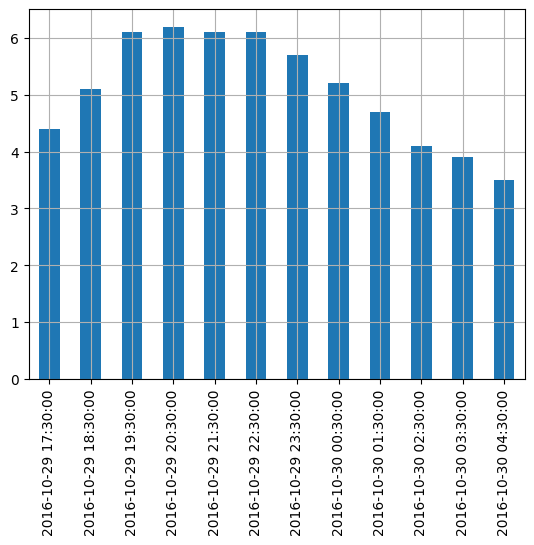

In [ ]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()